In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('train.csv')

In [4]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [5]:
new_df=df.sample(30000,random_state=2)

In [6]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0


In [7]:
new_df.isnull().sum()

,0
id,0
qid1,0
qid2,0
question1,0
question2,0
is_duplicate,0


In [8]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0


In [9]:
new_df.duplicated().sum()

0

<Axes: xlabel='is_duplicate'>

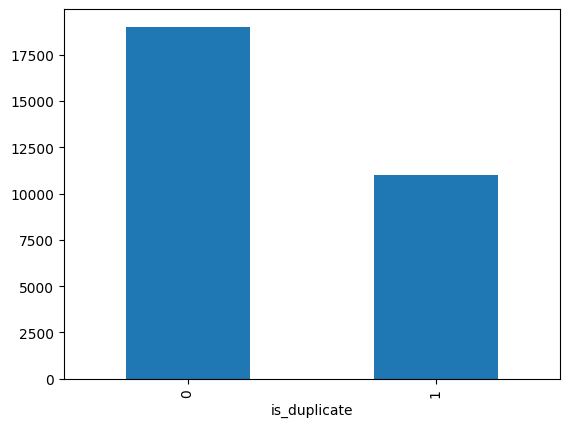

In [10]:
new_df['is_duplicate'].value_counts().plot(kind='bar')

In [11]:
qid=pd.Series(new_df['qid1'].to_list()+new_df['qid2'].to_list())
#number of unique positions
print("Number of unique position",np.unique(qid).shape[0])
x=qid.value_counts()>1
#Number of questions getting repeated
print("Number of questions getting repeated",x[x].shape[0])

Number of unique position 55299
Number of questions getting repeated 3480


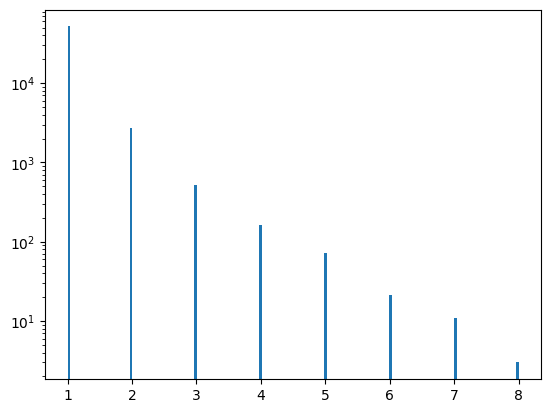

In [12]:
#repeated questions histogram
plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()

In [13]:
#feature engineering
new_df['q1_len']=new_df['question1'].str.len()
new_df['q2_len']=new_df['question2'].str.len()

In [14]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49,57
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,105,120
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,59,146
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,35,50


In [15]:
new_df['q1_num_words']=new_df['question1'].apply(lambda row:len(row.split(" ")))
new_df['q2_num_words']=new_df['question2'].apply(lambda row:len(row.split(" ")))
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77,12,12
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49,57,12,15
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,105,120,25,17
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,59,146,12,30
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,35,50,5,9


In [16]:
def common_words(row):
    w1=set(map(lambda word:word.lower().strip(),row['question1'].split(" ")))
    w2=set(map(lambda word:word.lower().strip(),row['question2'].split(" ")))
    return len(w1&w2)

In [17]:
new_df['common_words']=new_df.apply(common_words,axis=1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,common_words
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77,12,12,11
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49,57,12,15,7
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,105,120,25,17,2
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,59,146,12,30,0
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,35,50,5,9,3


In [18]:
def total_words(row):
    w1=set(map(lambda word:word.lower().strip(),row['question1'].split(" ")))
    w2=set(map(lambda word:word.lower().strip(),row['question2'].split()))
    return len(w1)+len(w2)

In [19]:
new_df['total_words']=new_df.apply(total_words,axis=1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,common_words,total_words
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77,12,12,11,24
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49,57,12,15,7,23
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,105,120,25,17,2,34
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,59,146,12,30,0,32
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,35,50,5,9,3,13


In [20]:
new_df['word_share']=round(new_df['common_words']/new_df['total_words'],2)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,common_words,total_words,word_share
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77,12,12,11,24,0.46
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49,57,12,15,7,23,0.30
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,105,120,25,17,2,34,0.06
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,59,146,12,30,0,32,0.00
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,35,50,5,9,3,13,0.23


Minimum Characters 2
Maximum Characters 391
Average Number of Characters 59


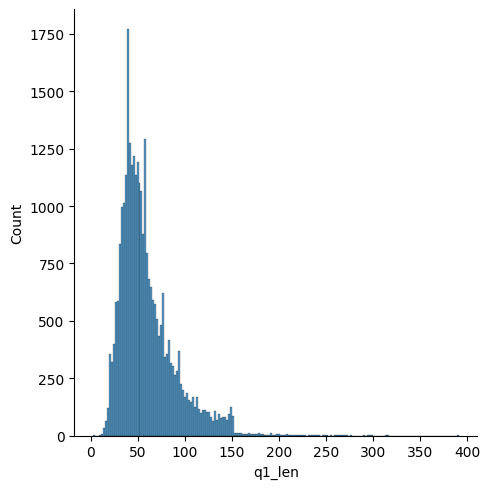

In [21]:
#once i have created the features I perfomed EDA as well
sns.displot(new_df['q1_len'])
print("Minimum Characters",new_df['q1_len'].min())
print("Maximum Characters",new_df['q1_len'].max())
print("Average Number of Characters",int(new_df['q1_len'].mean()))

Minimum Words 1
Maximum Words 72
Average Number of Words 10.969133333333334


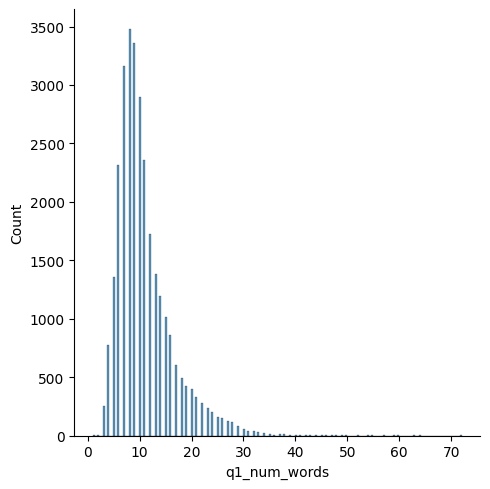

In [22]:
#once I'm doing the analysis on q1_num_words
sns.displot(new_df['q1_num_words'])
print("Minimum Words",new_df['q1_num_words'].min())
print("Maximum Words",new_df['q1_num_words'].max())
print("Average Number of Words",new_df['q1_num_words'].mean())

Minimum Words 1
Maximum Words 237
Average Number of Words 11.232133333333334


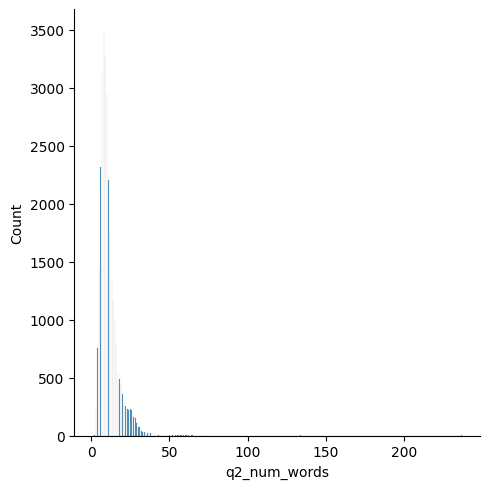

In [23]:
sns.displot(new_df['q2_num_words'])
print("Minimum Words",new_df['q1_num_words'].min())
print("Maximum Words",new_df['q2_num_words'].max())
print("Average Number of Words",new_df['q2_num_words'].mean())

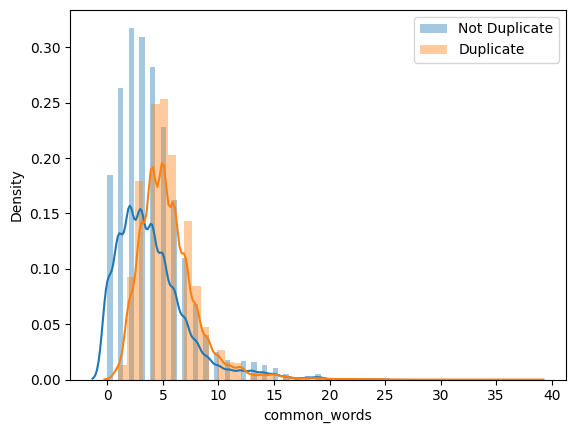

In [25]:
#common words
sns.distplot(new_df[new_df['is_duplicate']==0]['common_words'],label='Not Duplicate')
sns.distplot(new_df[new_df['is_duplicate']==1]['common_words'],label='Duplicate')
plt.legend()
plt.show()

In [27]:
ques_df=new_df[['question1','question2']]
ques_df.head()

,question1,question2
398782,What is the best marketing automation tool for...,What is the best marketing automation tool for...
115086,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...
327711,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...
367788,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...
151235,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...


In [30]:
final_df=new_df.drop(columns=['id','qid1','qid2','question1','question2'])
final_df.head()

,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,common_words,total_words,word_share
398782,1,76,77,12,12,11,24,0.46
115086,0,49,57,12,15,7,23,0.30
327711,0,105,120,25,17,2,34,0.06
367788,0,59,146,12,30,0,32,0.00
151235,0,35,50,5,9,3,13,0.23


In [31]:
#applying bag of words to question data frame
from sklearn.feature_extraction.text import CountVectorizer
questions=list(ques_df['question1'])+list(ques_df['question2'])
cv=CountVectorizer(max_features=3000)
q1_arr,q2_arr=np.vsplit(cv.fit_transform(questions).toarray(),2)

In [32]:
temp_df1=pd.DataFrame(q1_arr,index=ques_df.index)
temp_df2=pd.DataFrame(q2_arr,index=ques_df.index)
temp_df=pd.concat([temp_df1,temp_df2],axis=1)
temp_df

,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
398782,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
115086,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
327711,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
367788,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
151235,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243932,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
91980,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
266955,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
71112,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
final_df=pd.concat([final_df,temp_df],axis=1)
final_df.head()

,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,common_words,total_words,word_share,0,1,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
398782,1,76,77,12,12,11,24,0.46,0,0,...,0,0,0,0,0,0,0,0,0,0
115086,0,49,57,12,15,7,23,0.30,0,0,...,0,0,0,0,0,0,0,0,0,0
327711,0,105,120,25,17,2,34,0.06,0,0,...,0,0,0,0,0,0,0,0,0,0
367788,0,59,146,12,30,0,32,0.00,0,0,...,0,0,0,1,0,0,0,0,0,0
151235,0,35,50,5,9,3,13,0.23,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2,random_state=2)

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [38]:
y_pred=rf.predict(X_test)

In [40]:
accuracy_score(y_test,y_pred)*100

76.61666666666666

In [41]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.0/199.0 MB 5.0 MB/s eta 0:00:00


In [47]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [50]:
y_pred=xgb.predict(X_test)
print("Accuracy Score:",accuracy_score(y_test,y_pred)*100)

Accuracy Score: 76.36666666666667
